# Payment Date Prediction 

### Importing related Libraries 

In [1]:
!pip install xgboost
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import datetime
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from category_encoders import TargetEncoder
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [3]:
df = pd.read_csv("dataset.csv")

### Check the shape of the dataframe


In [4]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [6]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

### Display All the column names

In [7]:
for col in df.columns:
    print(col)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
posting_id
area_business
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


### Describe the entire dataset

In [8]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [9]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [10]:
null_percent = df.isnull().sum() * 100 / len(df)
null_value_df = pd.DataFrame({'null_percent': null_percent})
null_value_df

,null_percent
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [11]:
df[["invoice_id","doc_id"]]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [12]:
df[['baseline_create_date','document_create_date','document_create_date.1']]

,baseline_create_date,document_create_date,document_create_date.1
0,20200126.0,20200125,20200126
1,20190722.0,20190722,20190722
2,20190914.0,20190914,20190914
3,20200331.0,20200330,20200330
4,20191113.0,20191113,20191113
...,...,...,...
49995,20200421.0,20200417,20200421
49996,20190815.0,20190814,20190815
49997,20200219.0,20200218,20200219
49998,20191127.0,20191126,20191127


#### Please check, Column 'posting_id' is constant columns or not


In [13]:
df['posting_id']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
49995    1.0
49996    1.0
49997    1.0
49998    1.0
49999    1.0
Name: posting_id, Length: 50000, dtype: float64

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [14]:
print(df["isOpen"])
[col for col in df.columns if df["isOpen"].isnull().sum() > 0]

0        0
1        0
2        0
3        1
4        0
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: isOpen, Length: 50000, dtype: int64


[]

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [15]:
df.drop(['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'], axis=1,inplace=True)

### Please check from the dataframe whether all the columns are removed or not 

In [16]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [17]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Display the Number of Duplicate Rows

In [18]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [19]:
df=df.drop_duplicates(keep='first')
df.shape

(48839, 12)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [20]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [21]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [22]:
df.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [24]:
df[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [25]:
df['clear_date']=pd.to_datetime(df['clear_date'],format='%Y-%m-%d %H:%M:%S')
df['posting_date']=pd.to_datetime(df['posting_date'],format='%Y-%m-%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8


### Please check the datatype of all the columns after conversion of the above 4 columns

In [26]:
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [27]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [28]:
df[['total_open_amount']]

,total_open_amount
0,54273.28
1,79656.60
2,2253.86
3,3299.70
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [29]:
df['converted_usd']=np.where(df['invoice_currency']=='CAD', (df['total_open_amount']*0.7), df['total_open_amount'])
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,54273.28
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,USD,79656.60,2019-07-22,NAD1,79656.60
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,2253.86
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,CAD,3299.70,2020-03-31,CA10,2309.79
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,33133.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaT,2020.0,1.930797e+09,2020-04-21,2020-05-06,USD,3187.86,2020-04-21,NAA8,3187.86
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,6766.54
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,6120.86
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,63.48


### Display the new "converted_usd" column values

In [30]:
df[['converted_usd']]

,converted_usd
0,54273.28
1,79656.60
2,2253.86
3,2309.79
4,33133.29
...,...
49995,3187.86
49996,6766.54
49997,6120.86
49998,63.48


### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [31]:
df.buisness_year

0        2020.0
1        2019.0
2        2019.0
3        2020.0
4        2019.0
          ...  
49995    2020.0
49996    2019.0
49997    2020.0
49998    2019.0
49999    2019.0
Name: buisness_year, Length: 48839, dtype: float64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [32]:
df.drop(['invoice_currency','total_open_amount'], axis=1, inplace=True)

### Write a code to check the number of columns in dataframe

In [33]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [34]:
df.isna().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [35]:
df['clear_date'].isna().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [36]:
#Traing Set - containg non-null values
train_set=df[df['clear_date'].notnull()].copy()


In [37]:
#Testing set - containg null values
test_set=df[df['clear_date'].isnull()].copy()

### Check the number of Rows and Columns for both the dataframes 

In [38]:
print(train_set['clear_date'].notnull().sum())


39158


In [39]:
print(test_set['clear_date'].isnull().sum())

9681


### Display the 5 records from maindata and nulldata dataframes

In [40]:
train_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [41]:
test_set.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
train_set['delay'] = (train_set.loc[:,'clear_date'] - train_set.loc[:,'due_in_date']).dt.days

In [43]:
train_set['delay']

0         1
1        -3
2        92
4        -3
5        61
         ..
49994     0
49996     4
49997     0
49998     0
49999    -9
Name: delay, Length: 39158, dtype: int64

In [44]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [45]:
avgdelay = train_set.groupby('name_customer')['delay'].mean(numeric_only=False)

In [46]:
avgdelay

name_customer
11078 us                17.0
17135 associates       -10.0
17135 llc               -3.0
236008 associates       -3.0
99 CE                    2.0
                        ... 
YEN BROS corp            0.0
YEN BROS corporation    -0.5
YEN BROS llc            -2.0
ZARCO co                -1.0
ZIYAD  us                6.0
Name: delay, Length: 3889, dtype: float64

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [47]:
train_set['avgdelay'] = train_set['name_customer'].map(avgdelay)

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [48]:
train_set['avgdelay']=24*60*60*train_set['avgdelay']
train_set.avgdelay

0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avgdelay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [49]:
train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61,6.172800e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0,-3.330000e+04
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4,-2.135915e+05
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0,9.051429e+04
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0,1.354030e+05


In [50]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39158 non-null  object        
 1   cust_number           39158 non-null  object        
 2   name_customer         39158 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         39158 non-null  float64       
 5   doc_id                39158 non-null  float64       
 6   posting_date          39158 non-null  datetime64[ns]
 7   due_in_date           39158 non-null  datetime64[ns]
 8   baseline_create_date  39158 non-null  datetime64[ns]
 9   cust_payment_terms    39158 non-null  object        
 10  converted_usd         39158 non-null  float64       
 11  delay                 39158 non-null  int64         
 12  avgdelay              39158 non-null  float64       
dtypes: datetime64[ns

### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [51]:
train_set.drop(['delay', 'clear_date'], axis=1, inplace=True)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [52]:
X=train_set[set(train_set.columns) - set(['avgdelay'])]  # x dataframe all the columns without the avg_delay column

In [53]:
y=train_set['avgdelay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [54]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X,y, test_size= 0.4, train_size=0.6)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [55]:
X_train.shape

(23494, 10)

In [56]:
X_loc_test.shape

(15664, 10)

In [57]:
y_train.shape

(23494,)

In [58]:
y_loc_test.shape

(15664,)

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [59]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test,y_loc_test,test_size= 0.5,train_size= 0.5)

### Please check for the number of rows and columns of all the 4 dataframes 

In [60]:
X_val.shape

(7832, 10)

In [61]:
X_test.shape

(7832, 10)

In [62]:
y_test.shape

(7832,)

In [63]:
y_val.shape

(7832,)

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

In [64]:
sns.set_style('ticks')
sns.set(rc = {'figure.figsize':(15,6)})
sns.set_context('poster')

<AxesSubplot:xlabel='avgdelay', ylabel='Density'>

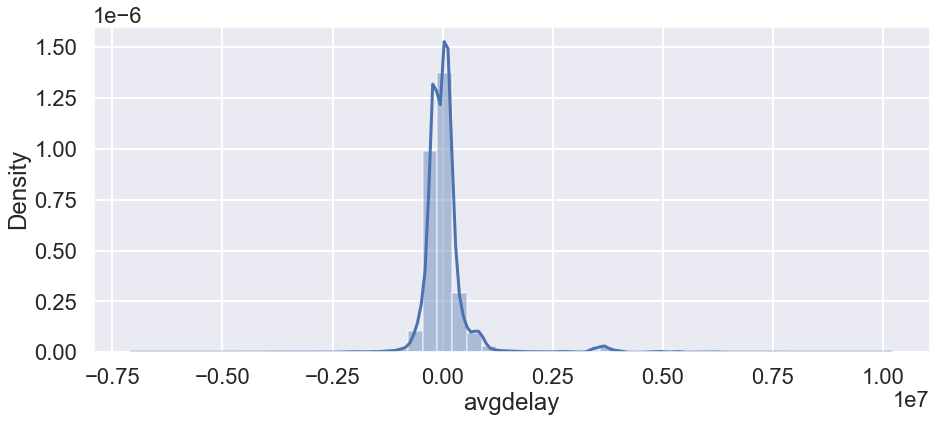

In [65]:
sns.distplot(y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [66]:
new_df=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()
new_df

,name_customer,doc_id
0,11078 us,1
1,236008 associates,1
2,99 CE associates,2
3,99 CE co,1
4,99 CE corporation,2
...,...,...
3055,YEN BROS co,1
3056,YEN BROS corporation,2
3057,YEN BROS llc,1
3058,ZARCO co,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

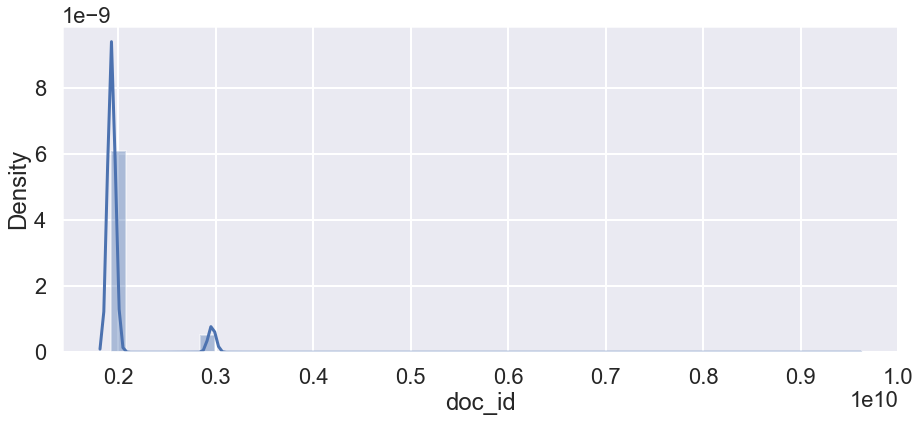

In [67]:
sns.distplot(X_train['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

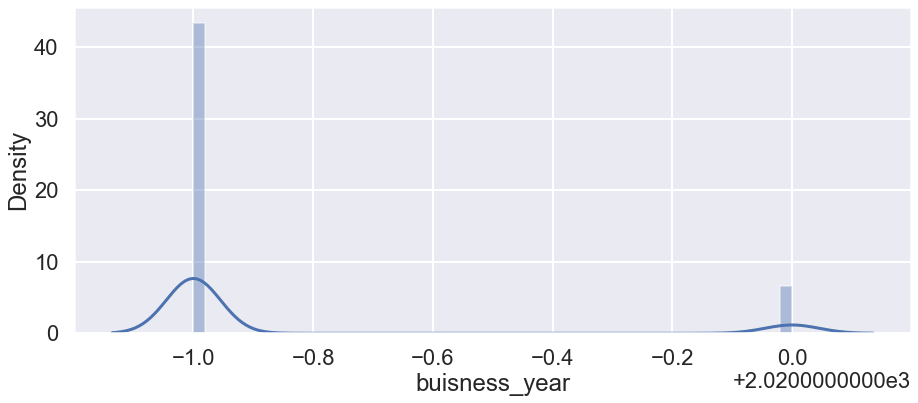

In [68]:
sns.distplot(X_train['buisness_year'])

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

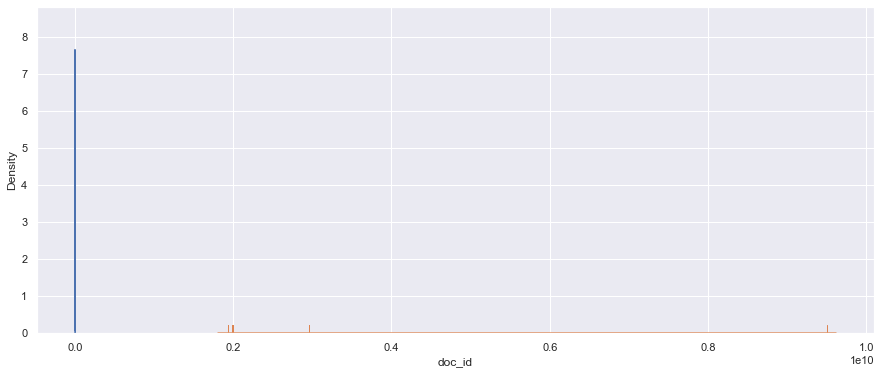

In [69]:
sns.set_style('ticks')
sns.set(rc={'figure.figsize':(15,6)})
sns.set_context='poster'
sns.distplot(X_train['buisness_year'], hist=False, rug=True)
sns.distplot(X_train['doc_id'], hist=False, rug=True)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [70]:
X_train

,name_customer,buisness_year,cust_payment_terms,cust_number,due_in_date,posting_date,baseline_create_date,converted_usd,business_code,doc_id
748,MY MOT trust,2019.0,NAA8,0100021392,2019-04-03,2019-03-19,2019-03-19,14864.040,U001,1.928990e+09
19635,SUGAR llc,2019.0,NAVQ,0200712102,2019-10-05,2019-08-06,2019-08-06,39714.000,U001,1.929709e+09
47046,GORDON F corporation,2019.0,CA10,140105847,2019-07-04,2019-06-23,2019-06-24,4144.210,CA02,2.960557e+09
32635,COSTCO trust,2019.0,CA10,0140104429,2019-09-06,2019-08-26,2019-08-27,9985.388,CA02,2.960575e+09
17868,WAL-MAR llc,2019.0,NAH4,0200769623,2019-10-27,2019-10-12,2019-10-12,6865.680,U001,1.930001e+09
...,...,...,...,...,...,...,...,...,...,...
30809,C&S WH corp,2019.0,NAGD,0200762301,2019-05-12,2019-03-08,2019-03-08,2476.760,U001,1.928929e+09
11029,LOB corp,2020.0,CA10,0140104409,2020-02-24,2020-02-12,2020-02-14,40635.196,CA02,2.960614e+09
15539,KRAFT F in,2019.0,NAX2,CCU013,2019-03-30,2019-03-30,2019-03-30,4086.720,U001,1.929032e+09
42527,RESTA foundation,2019.0,NAA8,200974851,2019-04-24,2019-04-09,2019-04-09,8859.470,U001,1.929109e+09


In [71]:
X_train.describe()

,buisness_year,converted_usd,doc_id
count,23494.000000,23494.000000,2.349400e+04
mean,2019.131736,30870.898344,2.012195e+09
std,0.338210,36177.932726,2.894058e+08
min,2019.000000,2.400000,1.928502e+09
25%,2019.000000,4460.405000,1.929171e+09
50%,2019.000000,16944.315000,1.929729e+09
75%,2019.000000,46066.787500,1.930207e+09
max,2020.000000,632134.240000,9.500000e+09


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [72]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [73]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [74]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [75]:
X_train[['business_code', 'business_code_enc']]

,business_code,business_code_enc
748,U001,1
19635,U001,1
47046,CA02,0
32635,CA02,0
17868,U001,1
...,...,...
30809,U001,1
11029,CA02,0
15539,U001,1
42527,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [76]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [77]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [78]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [79]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [80]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [81]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [82]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [83]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [84]:
X_train.dtypes

buisness_year                    float64
cust_number                        int32
due_in_date               datetime64[ns]
posting_date              datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
doc_id                           float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [85]:
X_val.dtypes

buisness_year                    float64
cust_number                        int32
due_in_date               datetime64[ns]
posting_date              datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
doc_id                           float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [86]:
X_test.dtypes

buisness_year                    float64
cust_number                        int32
due_in_date               datetime64[ns]
posting_date              datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
doc_id                           float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [87]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [88]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [89]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [90]:
X_train, X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [91]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [92]:
X_train, X_val, X_test = custom({'due_in_date'})

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [93]:
X_train.dtypes

buisness_year             float64
cust_number                 int32
converted_usd             float64
doc_id                    float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [94]:
X_val.dtypes

buisness_year             float64
cust_number                 int32
converted_usd             float64
doc_id                    float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [95]:
X_test.dtypes

buisness_year             float64
cust_number                 int32
converted_usd             float64
doc_id                    float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [96]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [97]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [98]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [99]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [100]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_createdate',
 'month_of_createdate',
 'year_of_due',
 'year_of_postingdate',
 'month_of_due',
 'day_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

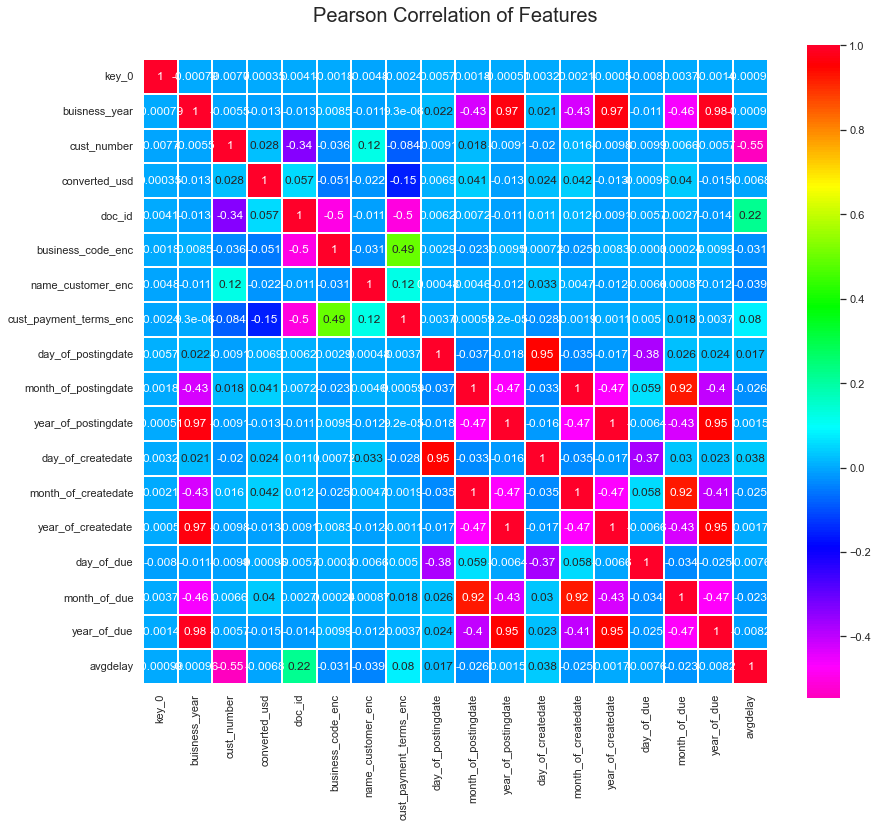

In [101]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [102]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [103]:
sel.variances_

array([1.14381451e-01, 1.74127643e+15, 1.30878711e+09, 8.37521794e+16,
       2.76525543e-01, 1.05555007e+06, 1.29999381e+02, 7.51662820e+01,
       1.22722940e+01, 1.14435750e-01, 7.68586780e+01, 1.22806916e+01,
       1.14595877e-01, 7.68294005e+01, 1.20836518e+01, 1.17234377e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [104]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [105]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [106]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [107]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

601985.0962254711

### Display The Comparison Lists

In [108]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[286585501956.7409],[0.37803686462800457],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [109]:
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [110]:
MSE_Score.append(mean_squared_error(y_test,predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [111]:
predict_test=regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

708923.3750285681

### Display The Comparison Lists

In [112]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Support Vector Regression'],[286585501956.7409, 463854205584.74335],[0.37803686462800457, -0.006681126892878364],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [113]:
Algorithm.append('Decision Tree Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [114]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [115]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

482106.10895612347

### Display The Comparison Lists

In [116]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression'],[286585501956.7409, 463854205584.74335, 177486087668.31296],[0.37803686462800457, -0.006681126892878364, 0.614810230045218],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [117]:
Algorithm.append('Random Forest Regression')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [118]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [119]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

460449.517237321

### Display The Comparison Lists


In [120]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression'],[286585501956.7409, 463854205584.74335, 177486087668.31296, 156796113605.971],[0.37803686462800457, -0.006681126892878364, 0.614810230045218, 0.6597127148210246],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [121]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [122]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [123]:
predict_test = regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

370591.1985399001

### Display The Comparison Lists


In [124]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i, end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGB Regressor'],[286585501956.7409, 463854205584.74335, 177486087668.31296, 156796113605.971, 91001922535.17064],[0.37803686462800457, -0.006681126892878364, 0.614810230045218, 0.6597127148210246, 0.8025027760357615],

## You need to make the comparison list into a comparison dataframe 

In [125]:
Comparision = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns=['Algorithm','MSE_Score','R2_score'])
Comparision

,Algorithm,MSE_Score,R2_score
0,LinearRegression,2.865855e+11,0.378037
1,Support Vector Regression,4.638542e+11,-0.006681
2,Decision Tree Regression,1.774861e+11,0.614810
3,Random Forest Regression,1.567961e+11,0.659713
4,XGB Regressor,9.100192e+10,0.802503


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [126]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [127]:
mean_squared_error(y_test,predictedfinal,squared=False)

301665.24913415307

### Calculate the mean Square Error for validation dataset

In [128]:
mean_squared_error(y_val, predictedfinal, squared=False)

932834.7786824207

### Calculate the R2 score for test

In [129]:
R2_Score.append(r2_score(y_test, predicted))

### Calculate the R2 score for Validation

In [130]:
R2_Score.append(r2_score(y_val, predicted))

### Calculate the Accuracy for train Dataset 

In [131]:
regressorfinal.score(X_train, y_train)*100

95.57875490118064

### Calculate the accuracy for validation

In [132]:
regressorfinal.score(X_val, y_val)*100

72.50271120184159

### Calculate the accuracy for test

In [133]:
regressorfinal.score(X_test, y_test)*100

80.25027760357615

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [134]:
test_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Check for the number of rows and columns in the nulldata

In [135]:
test_set.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [136]:
print(test_set.describe())
print(test_set.info())

       buisness_year        doc_id  converted_usd
count         9681.0  9.681000e+03    9681.000000
mean          2020.0  2.006165e+09   32065.681125
std              0.0  2.673629e+08   35419.613688
min           2020.0  1.930535e+09       0.720000
25%           2020.0  1.930658e+09    5607.190000
50%           2020.0  1.930731e+09   19024.190000
75%           2020.0  1.930818e+09   47752.640000
max           2020.0  2.960636e+09  653644.800000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-

### Storing the Nulldata into a different dataset 
# for BACKUP

In [137]:
nulldata=test_set.copy()
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [138]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(test_set['business_code'])
test_set['business_code_enc'] = business_codern.transform(test_set['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [139]:
test_set['cust_number'] = test_set['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [140]:
test_set['day_of_cleardate'] = test_set['clear_date'].dt.day
test_set['month_of_cleardate'] = test_set['clear_date'].dt.month
test_set['year_of_cleardate'] = test_set['clear_date'].dt.year


test_set['day_of_postingdate'] = test_set['posting_date'].dt.day
test_set['month_of_postingdate'] = test_set['posting_date'].dt.month
test_set['year_of_postingdate'] = test_set['posting_date'].dt.year


test_set['day_of_due'] = test_set['due_in_date'].dt.day
test_set['month_of_due'] = test_set['due_in_date'].dt.month
test_set['year_of_due'] = test_set['due_in_date'].dt.year


test_set['day_of_createdate'] = test_set['baseline_create_date'].dt.day
test_set['month_of_createdate'] = test_set['baseline_create_date'].dt.month
test_set['year_of_createdate'] = test_set['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [141]:
test_set['cust_payment_terms_enc']=label_encoder1.transform(test_set['cust_payment_terms'])
test_set['business_code_enc']=label_encoder1.transform(test_set['business_code'])
test_set['name_customer_enc']=label_encoder.transform(test_set['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [142]:
test_set.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [143]:
test_set=test_set.drop(['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"], axis = 1)

### Check the information of the "nulldata" dataframe

In [144]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [145]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 4782 to 40085
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   buisness_year           7832 non-null   float64
 1   cust_number             7832 non-null   int32  
 2   converted_usd           7832 non-null   float64
 3   doc_id                  7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [146]:
X_test.columns

Index(['buisness_year', 'cust_number', 'converted_usd', 'doc_id',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [147]:
test_set.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [148]:
nulldata2=test_set[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [149]:
display(nulldata2)

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,65,2693,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2775,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,87,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2011,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,718,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,65,2967,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,65,2965,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,65,794,20,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,65,2739,20,25,3,2020,25,3,2020,9,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [150]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [151]:
final_result = pd.Series(final_result,name='avgdelay')

### Display the "avg_delay" column

In [152]:
display(avgdelay)

name_customer
11078 us                17.0
17135 associates       -10.0
17135 llc               -3.0
236008 associates       -3.0
99 CE                    2.0
                        ... 
YEN BROS corp            0.0
YEN BROS corporation    -0.5
YEN BROS llc            -2.0
ZARCO co                -1.0
ZIYAD  us                6.0
Name: delay, Length: 3889, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [153]:
nulldata.reset_index(drop=True,inplace=True)
Final = nulldata.merge(final_result , on = test_set.index )

### Display the "Final" dataframe 

In [154]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,1.422862e+06
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,1.011932e+06
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,2.089337e+06
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,4.761729e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,1.300966e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,5.437329e+05
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,3.644939e+05
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,6.811788e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,1.323596e+06


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [155]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [156]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avgdelay'], unit='s')

### Display the "clear_date" column

In [157]:
display(Final['clear_date'])

0      2020-04-26 11:14:21.750000
1      2020-04-14 17:05:32.250000
2      2020-04-19 04:22:17.125000
3      2020-05-05 12:16:12.937500
4      2020-05-11 01:22:46.000000
                  ...            
9676   2020-03-31 07:02:12.937500
9677   2020-05-22 05:14:53.937500
9678   2020-04-02 21:12:58.812500
9679   2020-04-24 07:39:55.875000
9680   2020-05-15 21:37:54.687500
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [158]:
Final['avgdelay'] = Final.apply(lambda row: row.avgdelay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [159]:
display(Final['avgdelay'])

0       16.0
1       11.0
2       24.0
3        5.0
4       15.0
        ... 
9676     6.0
9677     4.0
9678     7.0
9679    15.0
9680     9.0
Name: avgdelay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [160]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avgdelay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [161]:
Final.drop(['avgdelay'], axis=1, inplace=True)

In [162]:
Final.drop(['key_0'], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [163]:
Final['Aging Bucket'].value_counts()

0-15               8068
16-30               905
31-45                98
46-60                17
Greatar than 60       1
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [164]:
display(Final)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-26 11:14:21.750000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,16-30
1,U001,0200744019,TARG us,2020-04-14 17:05:32.250000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-04-19 04:22:17.125000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,16-30
3,U001,0200739534,OK systems,2020-05-05 12:16:12.937500,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-05-11 01:22:46.000000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,16-30
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-03-31 07:02:12.937500,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,0-15
9677,U001,0200769623,WAL-MAR corporation,2020-05-22 05:14:53.937500,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-04-02 21:12:58.812500,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,0-15
9679,U001,0200900909,SYSCO co,2020-04-24 07:39:55.875000,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,16-30


### Store this dataframe into the .csv format

In [165]:
Final.to_csv('HRC80126W_VIDHI RAGHAV.csv')

# END OF THE PROJECT